In [27]:
import pandas as pd
from pathlib import Path
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def read_data():
    """
    Function to read housing.tgz from a url and decompress into housing.csv
    Returns a pandas DataFrame of the read file
    """
    tgz_path = Path("./housing.tgz")
    if not tgz_path.is_file():
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tgz_path)
        with tarfile.open(tgz_path) as tgz_file:
            tgz_file.extractall(path = ".") # decompress tgz file
    return pd.read_csv(Path("./housing/housing.csv"))

In [21]:
data = read_data()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [25]:
print(data["ocean_proximity"].value_counts())
print()
print(data.describe())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385

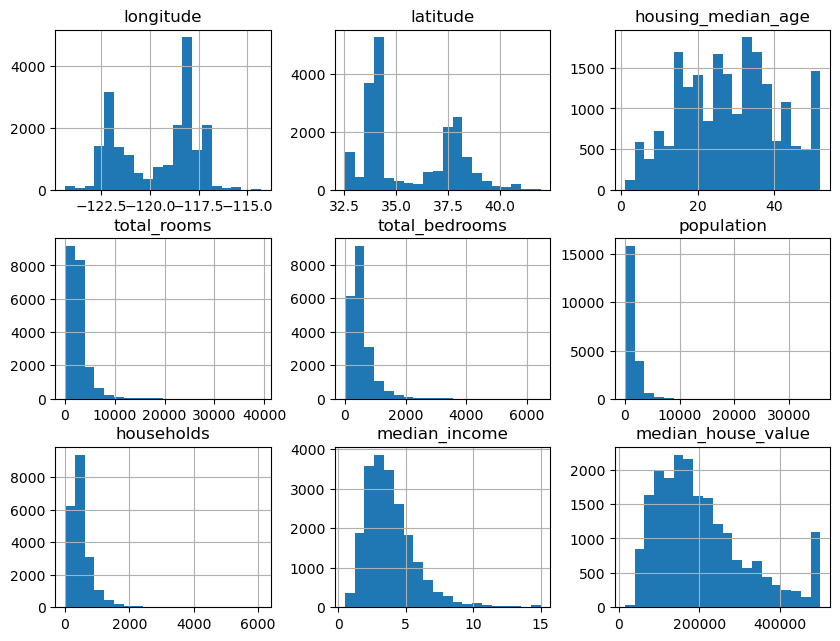

In [19]:
# plot histogram to better visualize data
data.hist(bins = 20, figsize = (10, 7.5))
plt.show()

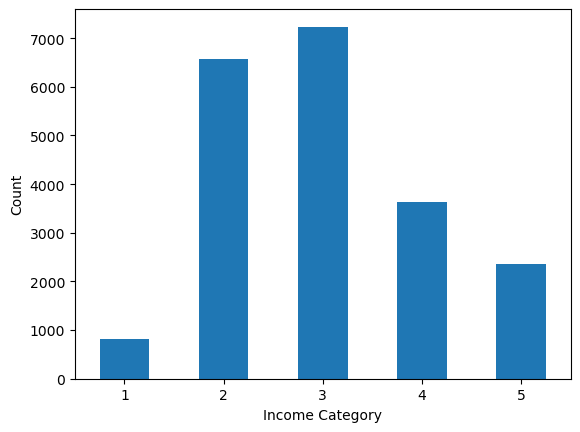

In [39]:
# stratify split by median income
data["income_category"] = pd.cut(data["median_income"],
                                 bins = [0, 1.5, 3, 4.5, 6, np.inf],
                                 labels = [1, 2, 3, 4, 5])
# visualize
data["income_category"].value_counts().sort_index().plot.bar(rot = 0)
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

In [63]:
# split by strata (just using first split)
split_train, split_test = train_test_split(data, test_size = 0.2,
                                           stratify = data["income_category"], random_state = 42)
# can drop income category column because it was just a splitting tool
split_train.drop(columns = "income_category", inplace = True, errors = "ignore")
split_test.drop(columns = "income_category", inplace = True, errors = "ignore")

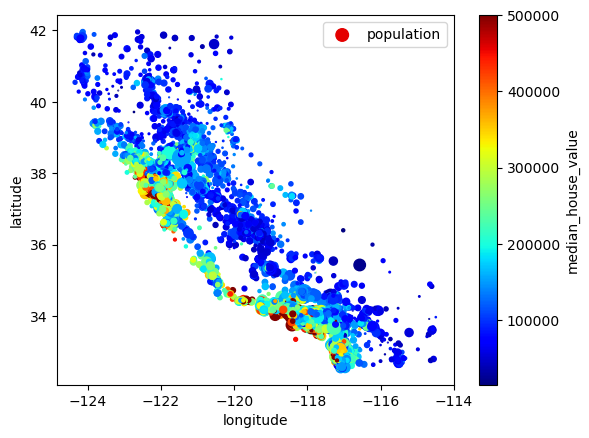

In [77]:
# visualize training data
# radius is population, color is median house value
split_train.plot(kind = "scatter", x = "longitude", y = "latitude",
                 s = split_train["population"] / 100, label = "population",
                 c = "median_house_value", cmap = "jet", colorbar = True,
                 legend = True, sharex = False)
plt.show()

In [87]:
# look for correlations
corr_matrix = split_train.corr(numeric_only = True)
print(corr_matrix["median_house_value"].sort_values(ascending = False))

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64
